In [1]:
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp
import pandas as pd
import numpy as np

# Set multiprocessing start method
mp.set_start_method('spawn', force=True)

# Set default tensor type
d_type = torch.float32
torch.set_default_dtype(d_type)
import warnings
warnings.filterwarnings("ignore")

from Path_MKV_Solver import PathMKV
from Param import DefaultParams
from high_dim_path_model import HighDimPathModel
from plot_functions import *

from avg_path_model import AvgPathModel

In [2]:
model_ = "TDAvg"
model_dic = {"TDTer": HighDimPathModel,
                "TDAvg": AvgPathModel}
d = 1

In [3]:
control_type1 = "B"
paramsB = DefaultParams(d=d,control_type=control_type1, N=5).params
setup_B = AvgPathModel(paramsB, delay=0) 
read_fileB ="TDAvg_delay0N5_path_B_d_1__202511181629_1632"
solver_B = PathMKV(setup_B, paramsB, saved_NN_file=read_fileB)


{'B': 12, 'X': 7, 'Xt': 2, 'XtAt': 3}
Loading pre-trained model from outputNN/TDAvg_delay0N5_path_B_d_1__202511181629_1632.pth
✅ Model loaded successfully.
current filename: path_B_d_1


In [4]:
control_type2 = "Xt"
paramsX = DefaultParams(d=d,control_type=control_type2, N=5).params
setup_X = AvgPathModel(paramsX,delay=0)  
read_fileX = "TDAvg_delay0N5_path_Xt_d_1__202511181645_1648"
solver_X = PathMKV(setup_X, paramsX, saved_NN_file=read_fileX)

control_type2 = "Xt"

{'B': 12, 'X': 7, 'Xt': 2, 'XtAt': 3}
Loading pre-trained model from outputNN/TDAvg_delay0N5_path_Xt_d_1__202511181645_1648.pth
✅ Model loaded successfully.
current filename: path_Xt_d_1


In [5]:
its = paramsB["train"]["iteration"]
# its, len(df2.values[:,0])
its
N =50

The path exists: /home/lix/MeanFieldControl/PathDependent/output


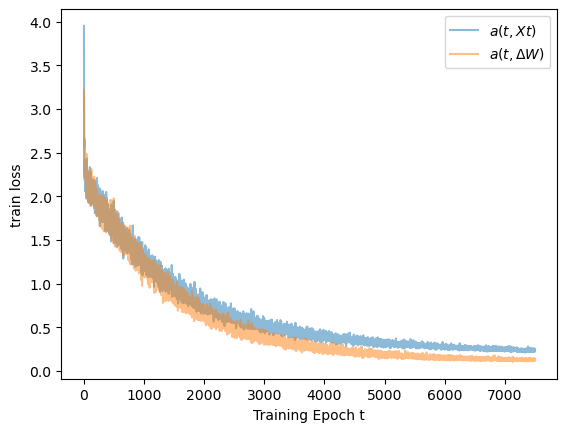

In [6]:

df = pd.read_csv(f"outputLoss/{read_fileX}_train_loss.csv")
x1 = df.values[:,0]


df2 = pd.read_csv(f"outputLoss/{read_fileB}_train_loss.csv")
x2 = list( df2.values[:,0] ) #+ [i.detach() for i in solver_B.training_cost_list]

plot_loss(x1, x2, its, N, title=f"{control_type1}_{control_type2}_d_{d}", loss_type="train", label1 =rf"$a(t, {control_type2})$",\
    label2 = r"$a(t, \Delta W)$", save=True)
   

The path exists: /home/lix/MeanFieldControl/PathDependent/output


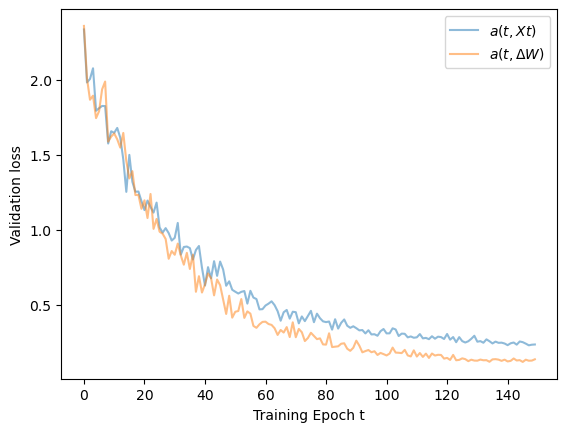

In [7]:

df = pd.read_csv(f"outputLoss/{read_fileX}_val_loss.csv")
x1 = df.values[:,0] 


df2 = pd.read_csv(f"outputLoss/{read_fileB}_val_loss.csv")
x2 = df2.values[:,0]

plot_loss(x1, x2, its, N, title=f"{control_type1}_{control_type2}_d_{d}", loss_type="Validation", label1 =fr"$a(t, {control_type2})$", label2 = r"$a(t, \Delta W)$", save=True)
   

1.2307175 0.03247963
1.2460058 0.011849333


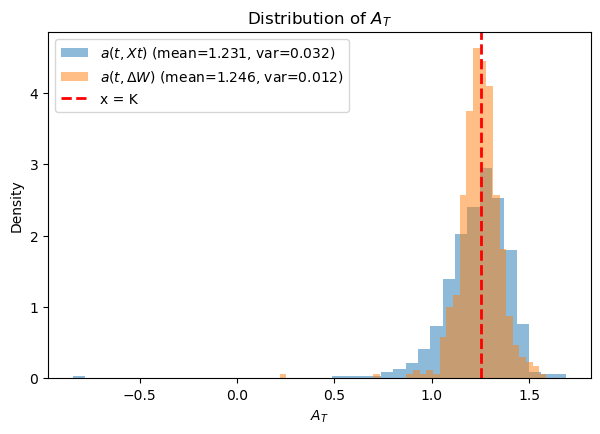

In [11]:

X_bufferX, _, _ =solver_X.simulation_paths()
X_pathX = torch.stack(X_bufferX, dim=1)  # [X0, X1, ..., XT]
X_bufferB, _, _ =solver_B.simulation_paths()
X_pathB = torch.stack(X_bufferB, dim=1)  # [X0, X1, ..., XT]


if d > 1:
    X_X = X_pathX.detach().squeeze(-1).numpy()    # α₂
    X_B = X_pathB.detach().squeeze(-1).numpy()    # α₂
else:
    X_X = X_pathX.detach().numpy()    # α₂
    X_B = X_pathB.detach().numpy()    # α₂


if model_ == "TDAvg":
    X1 = np.mean(X_X, axis=1)
    X1 = np.mean(X1, axis=1)
    
    X2 = np.mean(X_B, axis=1)
    X2 = np.mean(X2, axis=1)
else:

    X1 = np.mean(X_X[:,-1,:], axis=1)
    X2 = np.mean(X_B[:,-1,:], axis=1)


plot_two_distribution(X1, X2, setup_B.K, label1=rf"$a(t, {control_type2})$", label2=r"$a(t, \Delta W)$")

In [ ]:
np.shape(X_X)

(500, 6)


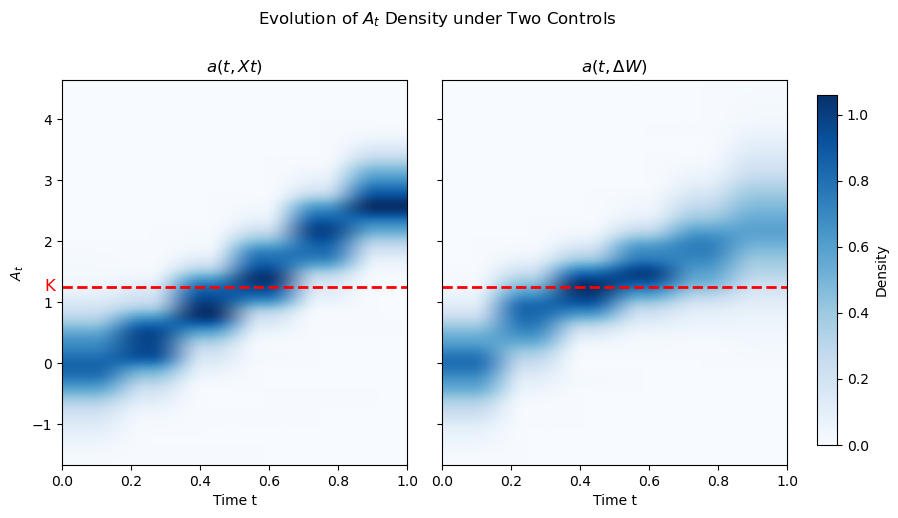

In [12]:
from scipy.stats import gaussian_kde
X1 = np.mean(X_X, axis=2)
X2 = np.mean(X_B, axis=2)

print(np.shape(X1)) # (M, N+1)
label1 = rf"$a(t, {control_type2})$"
label2 = r"$a(t, \Delta W)$"



plot_evolution_of_density(X1, X2, setup_B.K, label1, label2, xlabel=r"$A_t$")